In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
apps_df = pd.read_csv("datasets/googleplaystore.csv")
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Information of the data

In [3]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
apps_df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

What to do with missing values in rating?

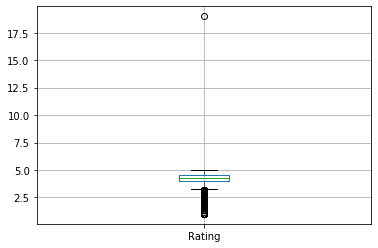

In [5]:
apps_df.boxplot()

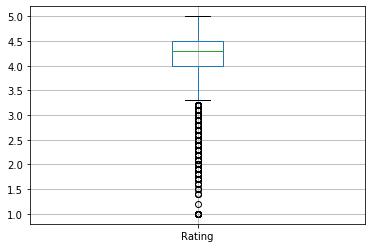

In [6]:
apps_df.drop(apps_df[apps_df['Rating'] > 5].index, inplace = True)
apps_df.boxplot()

Convert non-numerical values into numerical data

In [7]:
apps_df['Price'] = apps_df['Price'].str.replace('$','').astype(float)

In [8]:
apps_df['Installs'] = apps_df['Installs'].str.replace('+','')
apps_df['Installs'] = apps_df['Installs'].str.replace(',','')
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], downcast="float")

apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'])
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'])

In [10]:
apps_df.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546429e+07,1.027368
std,0.515219,2.927761e+06,8.502664e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [25]:
apps_df['Type'].fillna(str(apps_df['Type'].mode().values[0]),inplace=True)
apps_df['Current Ver'].fillna(str(apps_df['Current Ver'].mode().values[0]),inplace=True)
apps_df['Android Ver'].fillna(str(apps_df['Android Ver'].mode().values[0]),inplace=True)
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

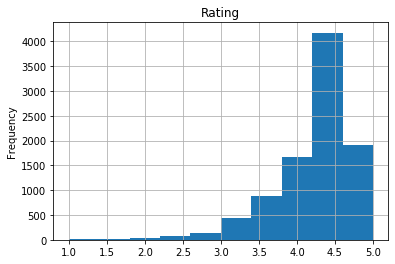

In [36]:
apps_df.hist("Rating")
plt.ylabel('Frequency')
plt.show()

Average rating is 4.5 according to the plot above

<function matplotlib.pyplot.show(*args, **kw)>

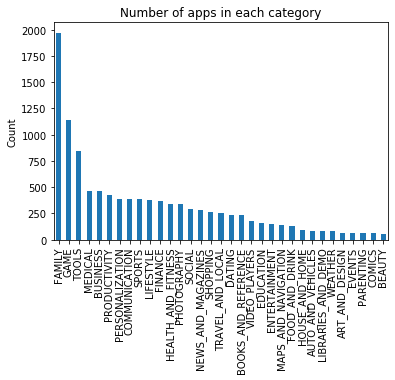

In [40]:
category_count = apps_df['Category'].value_counts()
category_count.plot.bar()
plt.title("Number of apps in each category")
plt.ylabel("Count")
plt.show

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 33 Text xticklabel objects>)

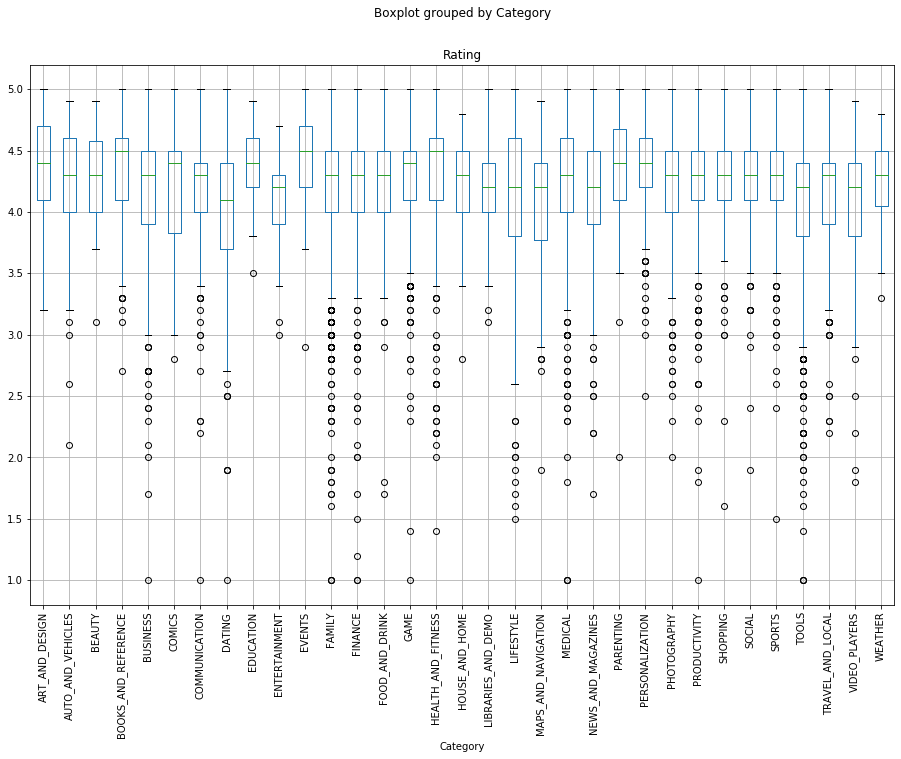

In [45]:
apps_df.boxplot("Rating", by="Category", figsize=(15,10))
plt.xticks(rotation='vertical')

The ratings of apps across all categories are similar